In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
sys.path.append("../src")

import rna_transform.utils as utils
from rna_transform.rna_helper import RNAHelper
from qspright.utils import best_convex_underestimator
from rna_transform.rna_tests import run_accuracy_tests
import itertools

In [2]:
positions = [5, 8, 10, 12, 15, 20]

query_args = {
    "query_method": "complex",
    "delays_method": "nso",
    "num_subsample": 8,
    "num_random_delays": 8,
    "b": 3
}

helper = RNAHelper(positions, subsampling = True, query_args = query_args)
n = helper.n
q = helper.q

print("n = {}, N = {:.2e}".format(n, q ** n))

{'signal': 'results/rna_subsampled.pickle'}
n = 6, N = 4.10e+03


## Test QSPRIGHT with different parameters

Construct a grid of parameters. For each entry, run multiple test rounds. Compute the average for each parameter selection. 

In [8]:
# iters = 1
# num_subsample_list = [4, 5, 6, 7]
# num_random_delays_list = [4, 6, 8, 10]
# b_list = [4, 5, 6, 7]

iters = 1
num_subsample_list = [2, 6]
num_random_delays_list = [3, 8]
b_list = [3]

result = run_accuracy_tests(helper, iters, num_subsample_list, num_random_delays_list, b_list)
    
sample_ratios, unique_sample_ratios, accs = result

 75%|███████▌  | 3/4 [00:00<00:00, 19.78it/s]

2 21
2 56
6 21


100%|██████████| 4/4 [00:00<00:00, 14.37it/s]

6 56


QhullError: QH6013 qhull input error: input is less than 2-dimensional since all points have the same x coordinate 0.1094

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 882426688  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 0.00053  Error-roundoff 3.9e-16  _one-merge 2e-15
  _near-inside 9.8e-15  Visible-distance 7.8e-16  U-max-coplanar 7.8e-16
  Width-outside 1.6e-15  _wide-facet 4.7e-15  _maxoutside 2.3e-15


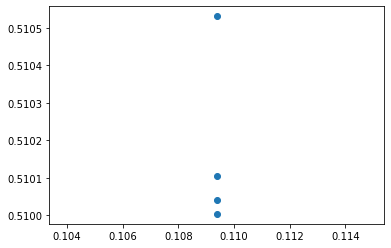

In [9]:
all_points = np.zeros(shape=[0,2])

for i, b in enumerate(b_list):
    s_values = np.mean(unique_sample_ratios[:, :, i, :], axis=-1).flatten()
    mse_values =  np.mean(accs[:, :, i, :], axis=-1).flatten()
    s_std = np.std(unique_sample_ratios[:, :, i, :], axis=-1).flatten()
    mse_std =  np.std(accs[:, :, i, :], axis=-1).flatten()
    
    plt.errorbar(s_values, mse_values, xerr= s_std, yerr= mse_std, label = "b = {}".format(b), fmt="o")
        
    all_points = np.concatenate((all_points, np.array([s_values, mse_values]).T), axis = 0)

if len(all_points) > 3:
    bcue = best_convex_underestimator(all_points)
    plt.plot(bcue[:,0], bcue[:,1], 'r--', lw=1.5, label="Best Cvx Underest.")

plt.xlabel('Unique Sample Ratio')
plt.ylabel('Prediction NMSE')
plt.legend()
plt.grid()
plt.savefig('figs/acc-vs-unique-sample-ratio.png')
plt.show()

QhullError: QH6013 qhull input error: input is less than 2-dimensional since all points have the same x coordinate 0.1094

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 878325780  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 0.00041  Error-roundoff 3.9e-16  _one-merge 2e-15
  _near-inside 9.8e-15  Visible-distance 7.8e-16  U-max-coplanar 7.8e-16
  Width-outside 1.6e-15  _wide-facet 4.7e-15  _maxoutside 2.3e-15


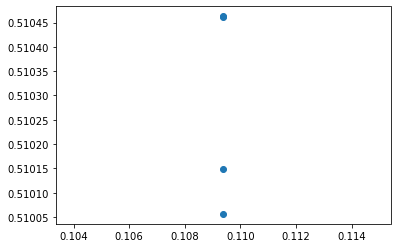

In [7]:
all_points = np.zeros(shape=[0,2])

for i, b in enumerate(b_list):
    s_values = np.mean(sample_ratios[:, :, i, :], axis=-1).flatten()
    mse_values =  np.mean(accs[:, :, i, :], axis=-1).flatten()
    s_std = np.std(sample_ratios[:, :, i, :], axis=-1).flatten()
    mse_std =  np.std(accs[:, :, i, :], axis=-1).flatten()

    plt.errorbar(s_values, mse_values, xerr= s_std, yerr= mse_std, label = "b = {}".format(b), fmt="o")

    all_points = np.concatenate((all_points, np.array([s_values, mse_values]).T), axis = 0)

if len(all_points) > 3:
    bcue = best_convex_underestimator(all_points)
    plt.plot(bcue[:,0], bcue[:,1], 'r--', lw=1.5, label="Best Cvx Underest.")

plt.xlabel('Total Sample Ratio')
plt.ylabel('Prediction NMSE')
plt.legend()
plt.grid()
plt.savefig('figs/acc-vs-total-sample-ratio.png')
plt.show()